Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report


In [4]:
#for data set loading
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Handling the misisng values
df['Age'].fillna(df['Age'].median(),inplace=True)

#iam dropping cabin beacue more null vlaues not affect

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [7]:
#check for null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
#Convert 'Sex' Column (Male = 0, Female = 1)
df['Sex']=df['Sex'].map({"male":0,"female":1})


In [9]:
#Convert 'Embarked' Column (C = 0, Q = 1, S = 2)
df['Embarked']=df['Embarked'].map({"C":0,"Q":1,"S":2})

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [11]:
X =df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]


In [12]:
y= df["Survived"]


In [13]:
#Load the data sets- train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [15]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (712, 7)
Testing Data Shape: (179, 7)


In [16]:
#Print the column names of train data
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
#Print the dimension of train and test data
print("Train Dimension",X_train.shape)
print("Test Dimension",X_test.shape)


Train Dimension (712, 7)
Test Dimension (179, 7)


In [18]:
#Print the number of missing values in each column of train and test data
print("Missing values in Training Data:\n", X_train.isnull().sum())
print("\nMissing values in Testing Data:\n", X_test.isnull().sum())


Missing values in Training Data:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Missing values in Testing Data:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## Data Visualization

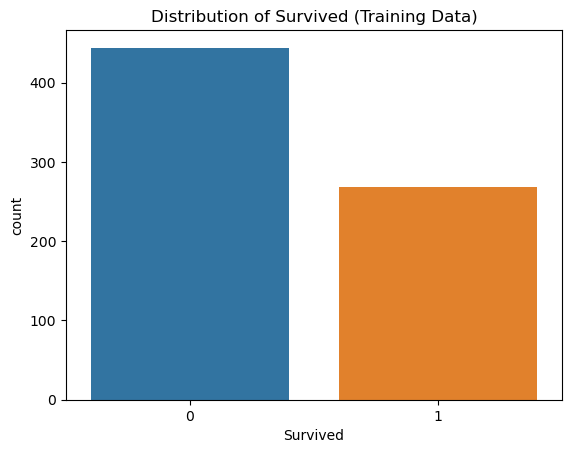

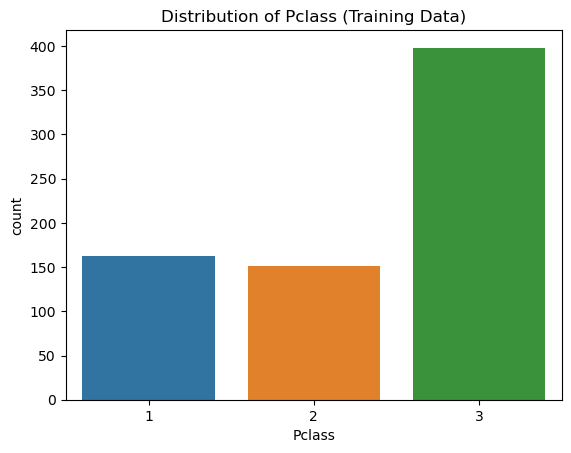

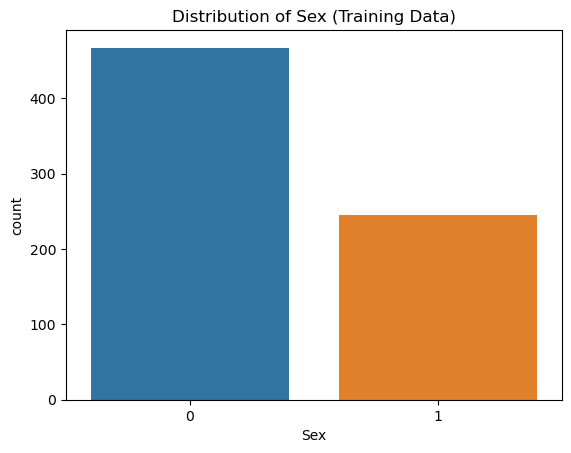

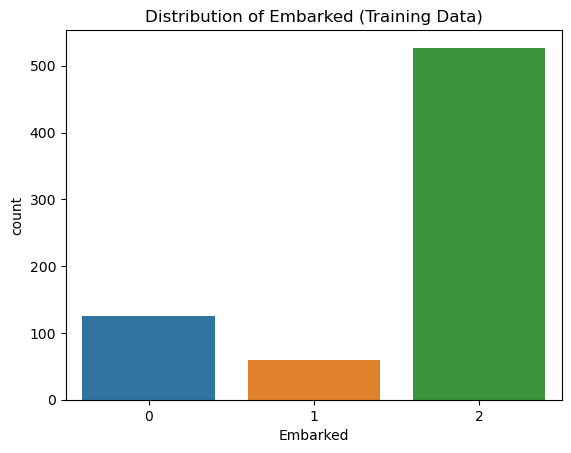

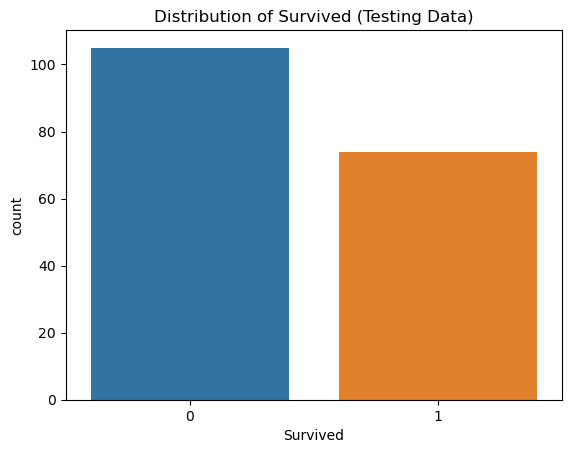

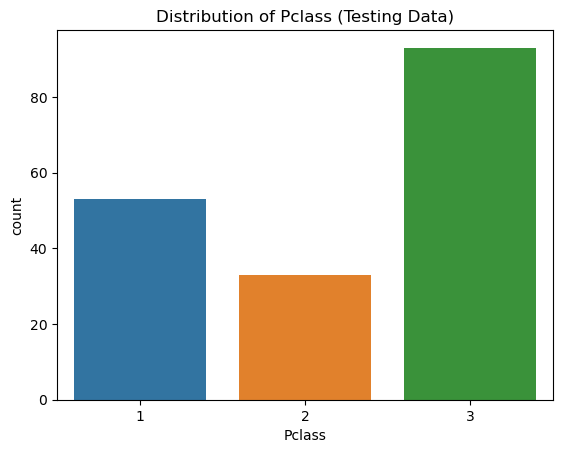

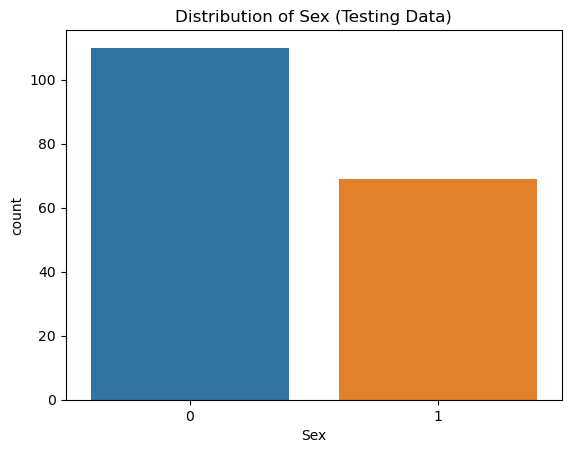

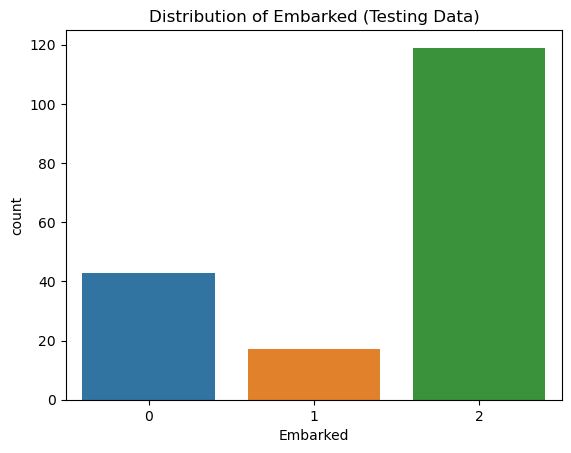

In [19]:
#Barchart of Survived, Pclass, Sex, Embarked

#barchart for survived
sns.countplot(x=y_train)
plt.title("Distribution of Survived (Training Data)")
plt.show()

#barchar for pclass
sns.countplot(x=X_train["Pclass"])
plt.title("Distribution of Pclass (Training Data)")
plt.show()

## Bar chart for Sex in training data
sns.countplot(x=X_train["Sex"])
plt.title("Distribution of Sex (Training Data)")
plt.show()

# Bar chart for Embarked in training data
sns.countplot(x=X_train["Embarked"])
plt.title("Distribution of Embarked (Training Data)")
plt.show()

# Bar chart for Survived in testing data
sns.countplot(x=y_test)
plt.title("Distribution of Survived (Testing Data)")
plt.show()

# Bar chart for Pclass in testing data
sns.countplot(x=X_test["Pclass"])
plt.title("Distribution of Pclass (Testing Data)")
plt.show()

# Bar chart for Sex in testing data
sns.countplot(x=X_test["Sex"])
plt.title("Distribution of Sex (Testing Data)")
plt.show()

# Bar chart for Embarked in testing data
sns.countplot(x=X_test["Embarked"])
plt.title("Distribution of Embarked (Testing Data)")
plt.show()


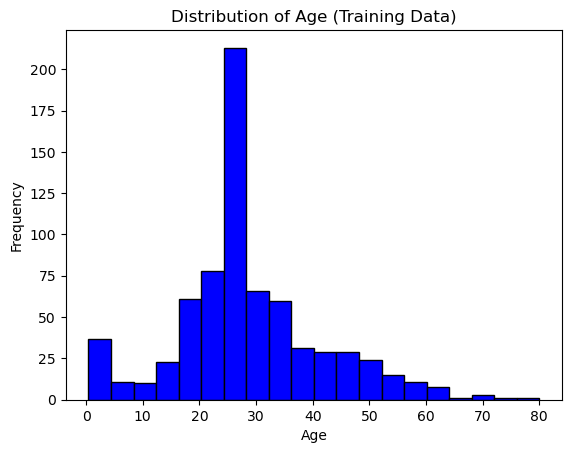

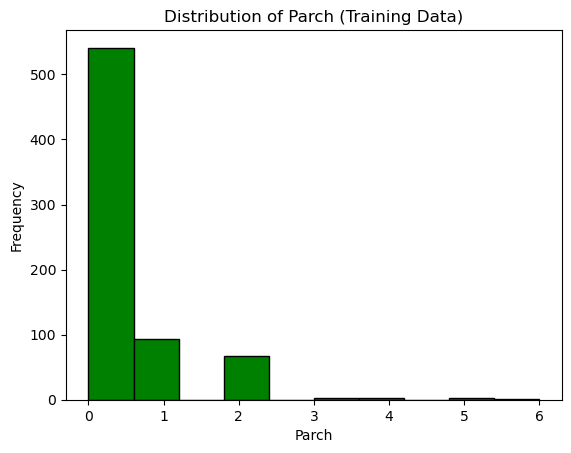

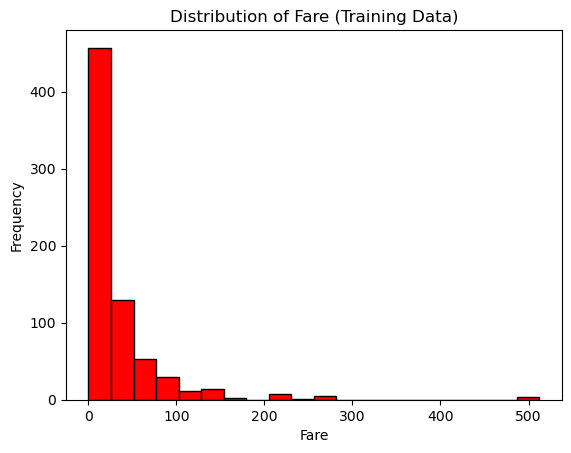

In [20]:
#Histogram of Age, Parch, Fare
#fro age
plt.hist(X_train['Age'],bins=20,color="blue",edgecolor="black")
plt.title("Distribution of Age (Training Data)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Histogram for Parch
plt.hist(X_train["Parch"], bins=10, color="green", edgecolor="black")
plt.title("Distribution of Parch (Training Data)")
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.show()

# Histogram for Fare
plt.hist(X_train["Fare"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Fare (Training Data)")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

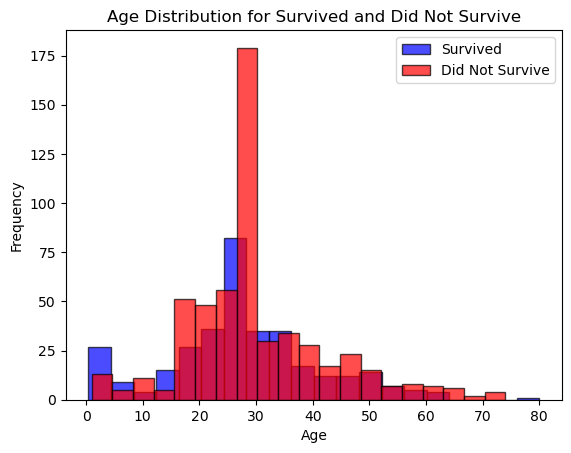

In [21]:

# Histogram for Age - Survived
plt.hist(df[df["Survived"] == 1]["Age"], bins=20, color="blue", edgecolor="black", alpha=0.7, label="Survived")

# Histogram for Age - Did Not Survive
plt.hist(df[df["Survived"] == 0]["Age"], bins=20, color="red", edgecolor="black", alpha=0.7, label="Did Not Survive")

plt.title("Age Distribution for Survived and Did Not Survive")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


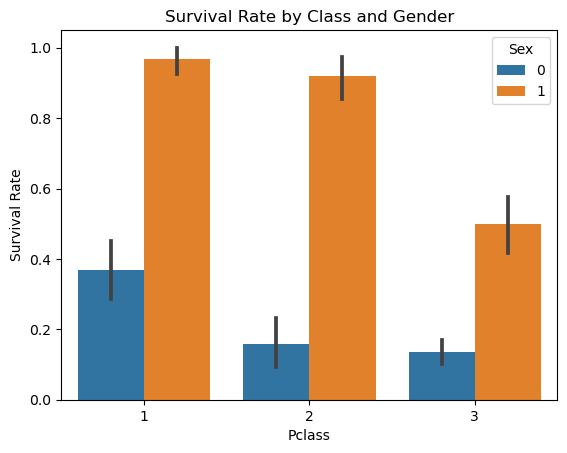

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


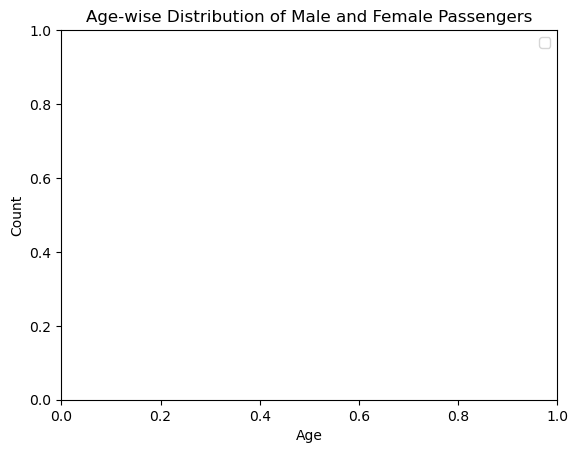

In [22]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

# Count class and gender-wise survival rate
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Rate")
plt.show()

# Age-wise distribution of Male and Female passengers
sns.histplot(df[df["Sex"] == "male"]["Age"], bins=20, color="blue", kde=True, label="Male", alpha=0.6)
sns.histplot(df[df["Sex"] == "female"]["Age"], bins=20, color="pink", kde=True, label="Female", alpha=0.6)

plt.title("Age-wise Distribution of Male and Female Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


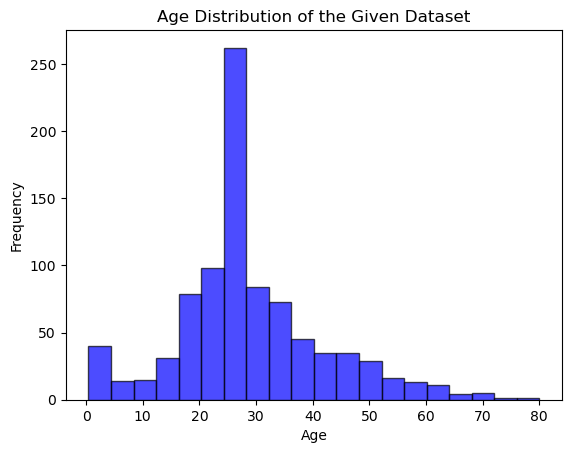

In [23]:
#Histogram of Age of the given data set(sample)
plt.hist(df["Age"], bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.title("Age Distribution of the Given Dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Handling Missing Values

In [24]:
#Replace the msiing values in Embarked column by 'S'
df["Embarked"].fillna("S", inplace=True)


In [25]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(), inplace=True)



In [26]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

import numpy as np

# Compute mean and standard deviation of non-missing Age values
mean_age = df["Age"].mean()
std_age = df["Age"].std()

# Generate random ages from the same distribution
missing_ages = np.random.normal(mean_age, std_age, df["Age"].isnull().sum())

# Fill missing Age values with generated random values
df.loc[df["Age"].isnull(), "Age"] = missing_ages


## Feature Engineering - Creating new features

In [27]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
# Creating a new feature FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1




In [28]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

# Creating a new feature IsAlone
df["IsAlone"] = df["FamilySize"] == 1


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [29]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
# Creating a new feature Has_cabin
df["Has_cabin"] = df["Cabin"].notnull()

# Dropping columns that are not useful for survival prediction
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)


## Model Building

In [30]:
#Prepare X and y
# Define X (features) and y (target variable)
X = df.drop("Survived", axis=1)
y = df["Survived"]


In [31]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ["Sex", "Embarked", "Has_cabin", "IsAlone"]

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])



In [32]:
# concat df_categorical with original df
# Concatenate the encoded categorical features with the original dataframe
X = pd.concat([X, pd.get_dummies(X[categorical_columns], drop_first=True)], axis=1)

# Drop the original categorical columns (as they are now encoded)
X.drop(columns=categorical_columns, inplace=True)


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


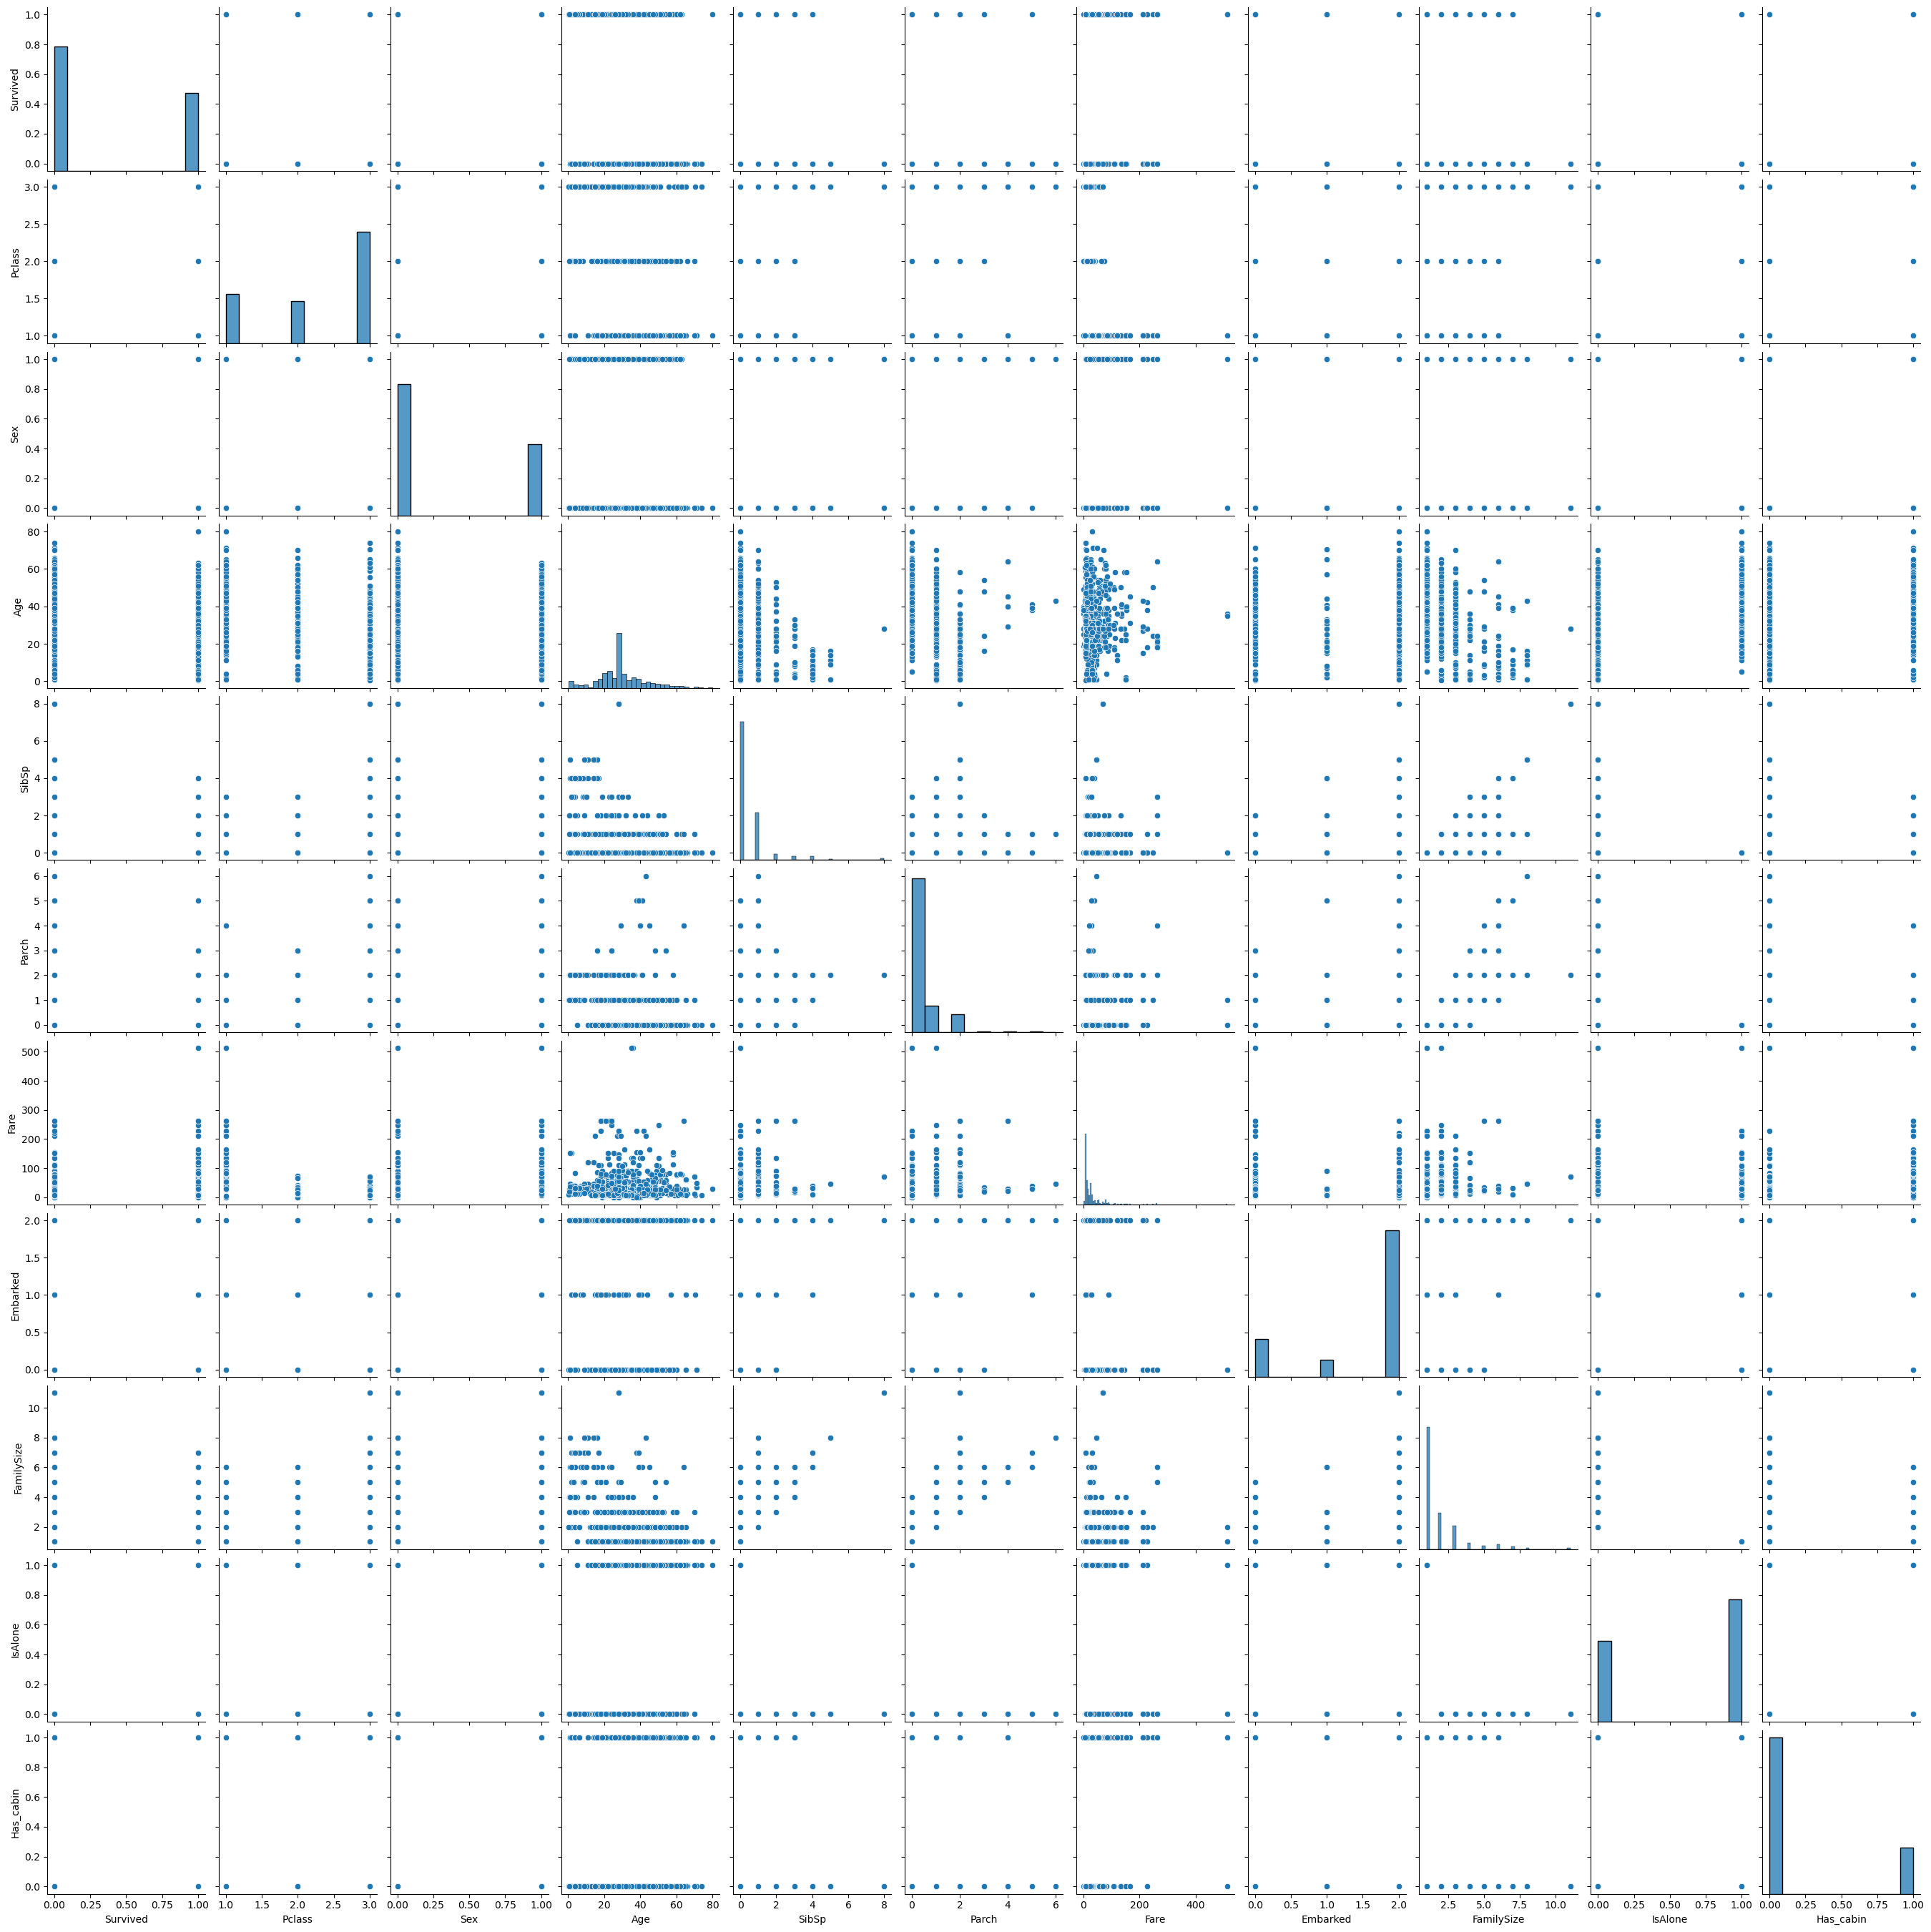

In [33]:
#Do a pairplot of all features\
sns.pairplot(df)
plt.show()

In [34]:
X

,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,3,22.0,1,0,7.2500,2
1,1,38.0,1,0,71.2833,2
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,2
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,1
888,3,28.0,1,2,23.4500,4
889,1,26.0,0,0,30.0000,1


In [35]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

# Splitting the data (90% train, 10% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [36]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

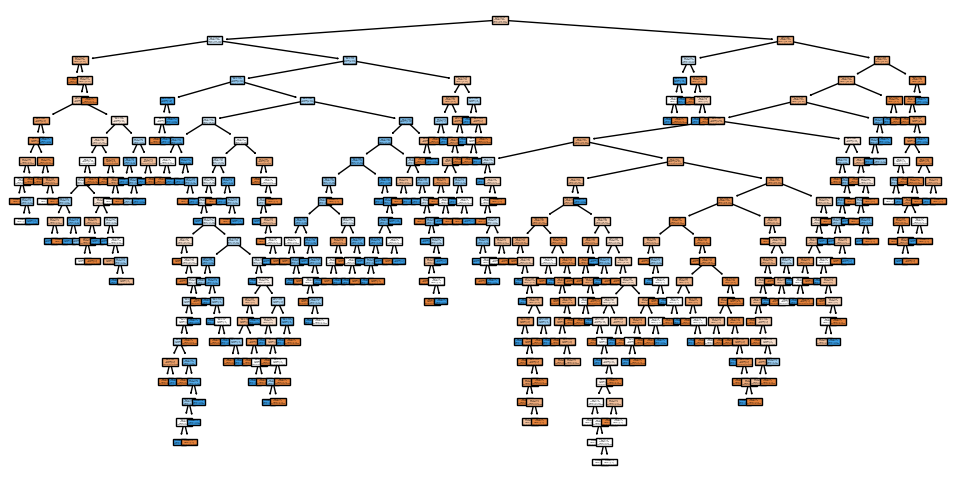

In [37]:
#Print the tree

# Importing required packages for visualization

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()


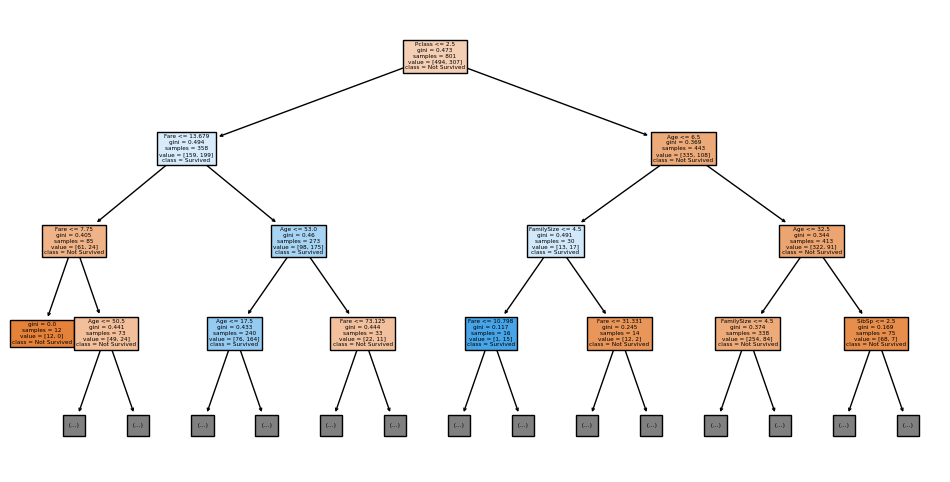

In [38]:
# plotting tree with max_depth=3
# Plot the decision tree with max_depth=3
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, max_depth=3)
plt.show()


<img src="tree2.png">

In [39]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = model.predict(X_validation)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute classification report (includes Precision, Recall, F1-score)
class_report = classification_report(y_validation, y_pred)
print("\nClassification Report:\n", class_report)

accuracy = accuracy_score(y_validation, y_pred)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[40 15]
 [22 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.68        55
           1       0.46      0.37      0.41        35

    accuracy                           0.59        90
   macro avg       0.55      0.55      0.55        90
weighted avg       0.57      0.59      0.58        90


Accuracy: 0.5888888888888889


In [40]:


y_pred = model.predict(X_validation)

print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))

print("\nAccuracy:", accuracy_score(y_validation, y_pred))


Confusion Matrix:
 [[40 15]
 [22 13]]

Accuracy: 0.5888888888888889
